In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make("MountainCar-v0")
env.reset()

array([-0.5165087,  0.       ], dtype=float32)

In [3]:
print(env.observation_space.high)
print(env.observation_space.low)
print(env.action_space.n)

[0.6  0.07]
[-1.2  -0.07]
3


In [4]:
DISCRETE_OS_SIZE = [20] * len(env.observation_space.high)

In [5]:
DISCRETE_OS_SIZE

[20, 20]

In [6]:
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / DISCRETE_OS_SIZE
#print(discrete_os_win_size)

In [7]:
EPSILON             = 0.5
LEARNING_RATE       = 0.1
DISCOUNT_FACTOR     = 0.95
EPISODES            = 2000
MOMENT              = 500
START_EPSILON_DECAY = 1
END_EPSILON_DECAY   = EPISODES // 2
EPSILON_DECAY_VALUE = EPSILON / (END_EPSILON_DECAY - START_EPSILON_DECAY)

In [8]:
q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE+ [env.action_space.n]))

In [9]:
episodes_rewards = []
aggregate_rewards = {
    'ep':  [], 
    'avg': [], 
    'min': [], 
    'max': []
} 

In [10]:
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(np.int))

In [10]:
# discrete_state = get_discrete_state(env.reset())
# print(discrete_state)
# print(np.argmax(q_table[discrete_state]))

0
episode:0, avg:-200.0, min:-200.0, max:-200.0
500
episode:500, avg:-200.0, min:-200.0, max:-200.0
we made it on episode: 653
we made it on episode: 669
we made it on episode: 710
we made it on episode: 724
we made it on episode: 726
we made it on episode: 794
we made it on episode: 803
we made it on episode: 808
we made it on episode: 817
we made it on episode: 824
we made it on episode: 826
we made it on episode: 828
we made it on episode: 830
we made it on episode: 831
we made it on episode: 888
we made it on episode: 898
we made it on episode: 901
we made it on episode: 902
we made it on episode: 909
we made it on episode: 924
we made it on episode: 931
we made it on episode: 950
we made it on episode: 975
1000
episode:1000, avg:-199.18, min:-200.0, max:-155.0
we made it on episode: 1015
we made it on episode: 1016
we made it on episode: 1019
we made it on episode: 1020
we made it on episode: 1022
we made it on episode: 1036
we made it on episode: 1041
we made it on episode: 1052


we made it on episode: 1696
we made it on episode: 1698
we made it on episode: 1699
we made it on episode: 1700
we made it on episode: 1701
we made it on episode: 1702
we made it on episode: 1709
we made it on episode: 1711
we made it on episode: 1712
we made it on episode: 1713
we made it on episode: 1715
we made it on episode: 1720
we made it on episode: 1722
we made it on episode: 1724
we made it on episode: 1725
we made it on episode: 1726
we made it on episode: 1728
we made it on episode: 1729
we made it on episode: 1730
we made it on episode: 1735
we made it on episode: 1739
we made it on episode: 1742
we made it on episode: 1745
we made it on episode: 1746
we made it on episode: 1751
we made it on episode: 1754
we made it on episode: 1761
we made it on episode: 1762
we made it on episode: 1769
we made it on episode: 1775
we made it on episode: 1778
we made it on episode: 1782
we made it on episode: 1793
we made it on episode: 1795
we made it on episode: 1800
we made it on episod

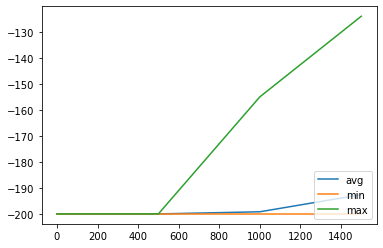

In [11]:
for episode in range(EPISODES):
    episode_reward = 0
    if episode % MOMENT == 0:
        print(episode)
        render = True
    else:
        render = False
        
    discrete_state = get_discrete_state(env.reset())
    done = False
    while not done:
        if np.random.random() > EPSILON:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)
            
        new_state, reward, done, _ = env.step(action)
        episode_reward += reward
        new_discrete_state = get_discrete_state(new_state)
        if render:
            env.render()
        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q    = q_table[discrete_state + (action, )]     
            new_q = (1 -  LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT_FACTOR * max_future_q)
            q_table[discrete_state + (action,)] = new_q
        elif new_state[0] >= env.goal_position:
            print(f"we made it on episode: {episode}")
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state
    
    if END_EPSILON_DECAY >= episode >= START_EPSILON_DECAY:
        EPSILON -= EPSILON_DECAY_VALUE
    
    episodes_rewards.append(episode_reward)

    if not episode % MOMENT:
            current = episodes_rewards[-MOMENT:]
            min_current = min(current)
            max_current = max(current)
            avg_current = sum(current) / len(current)
            aggregate_rewards['ep'].append(episode)
            aggregate_rewards['avg'].append(avg_current)
            aggregate_rewards['min'].append(min_current)
            aggregate_rewards['max'].append(max_current)
            
            print(f"episode:{episode}, avg:{avg_current}, min:{min_current}, max:{max_current}")
            
env.close()

plt.plot(aggregate_rewards['ep'],aggregate_rewards['avg'], label="avg")
plt.plot(aggregate_rewards['ep'],aggregate_rewards['min'], label="min")
plt.plot(aggregate_rewards['ep'],aggregate_rewards['max'], label="max")
plt.legend(loc=4)
plt.show();